# EDA of Beta Value Distribution

This notebook loads `merge_data_with_error.csv` and visualizes the distribution of the `beta_value` column.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [37]:
df = pd.read_csv('merged_data_with_error.csv')
df.head()

amplitude  frequency  beta_value     time     error
0        2.7        175    0.000191  8.17998  0.000191
1        2.7        175    0.000129  8.19998  0.000129
2        2.7        175    0.000069  8.21998  0.000069
3        2.7        175    0.000040  8.23998  0.000040
4        2.7        175    0.000042  8.25998  0.000042

In [38]:
df['beta_value'].describe()

count    1.861200e+05
mean     1.130965e-04
std      8.606217e-05
min      3.976942e-09
25%      4.572958e-05
50%      8.874953e-05
75%      1.670575e-04
max      4.714937e-04
Name: beta_value, dtype: float64

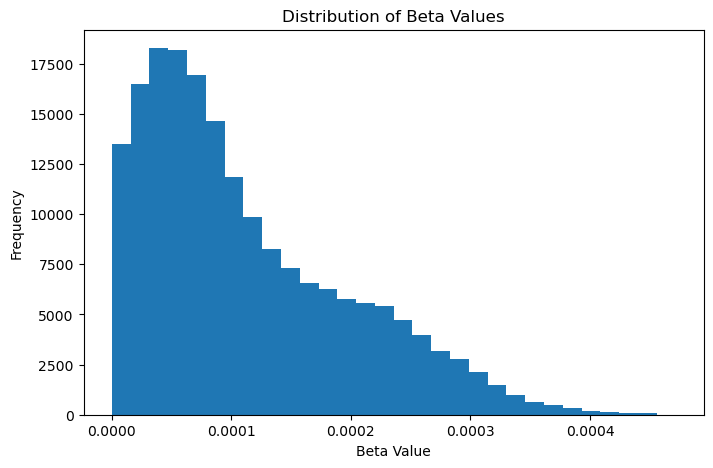

In [39]:
plt.figure(figsize=(8,5))
plt.hist(df['beta_value'], bins=30)
plt.xlabel('Beta Value')
plt.ylabel('Frequency')
plt.title('Distribution of Beta Values')
plt.show()

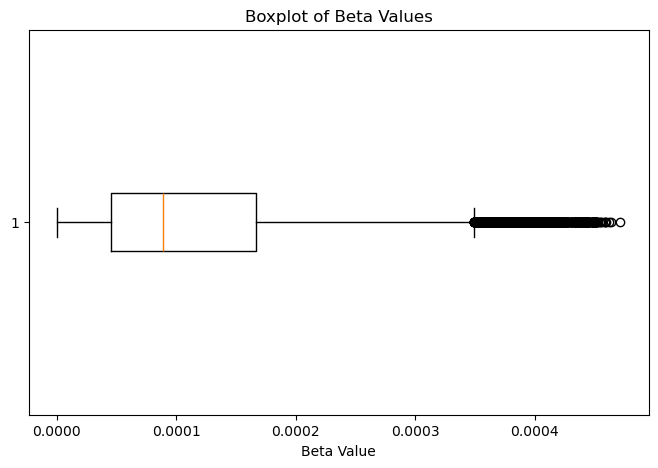

In [40]:
plt.figure(figsize=(8,5))
plt.boxplot(df['beta_value'], vert=False)
plt.xlabel('Beta Value')
plt.title('Boxplot of Beta Values')
plt.show()

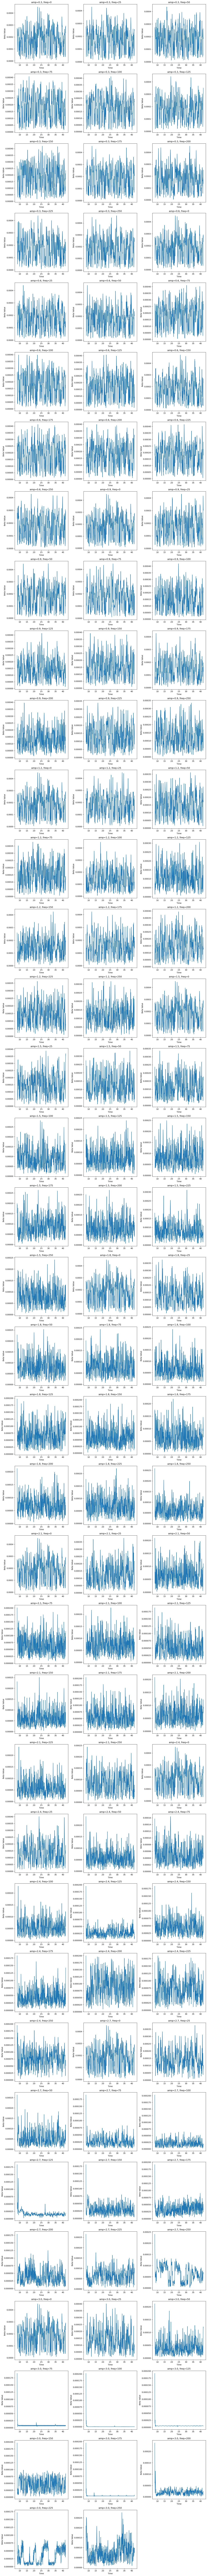

In [41]:
groups = df.groupby(['amplitude', 'frequency'])

# Prepare grid dimensions
n_pairs = len(groups)
n_cols = 3
n_rows = math.ceil(n_pairs / n_cols)

# --- 1) Plot each (amplitude, frequency) series in its own subplot ---
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), sharex=False, sharey=False)
axes = axes.flatten()

for ax, ((amp, freq), grp) in zip(axes, groups):
    ax.plot(grp['time'], grp['beta_value'])
    ax.set_title(f"amp={amp:.1f}, freq={int(freq)}")
    ax.set_xlabel('Time')
    ax.set_ylabel('Beta Value')

# Remove any unused subplots
for i in range(n_pairs, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



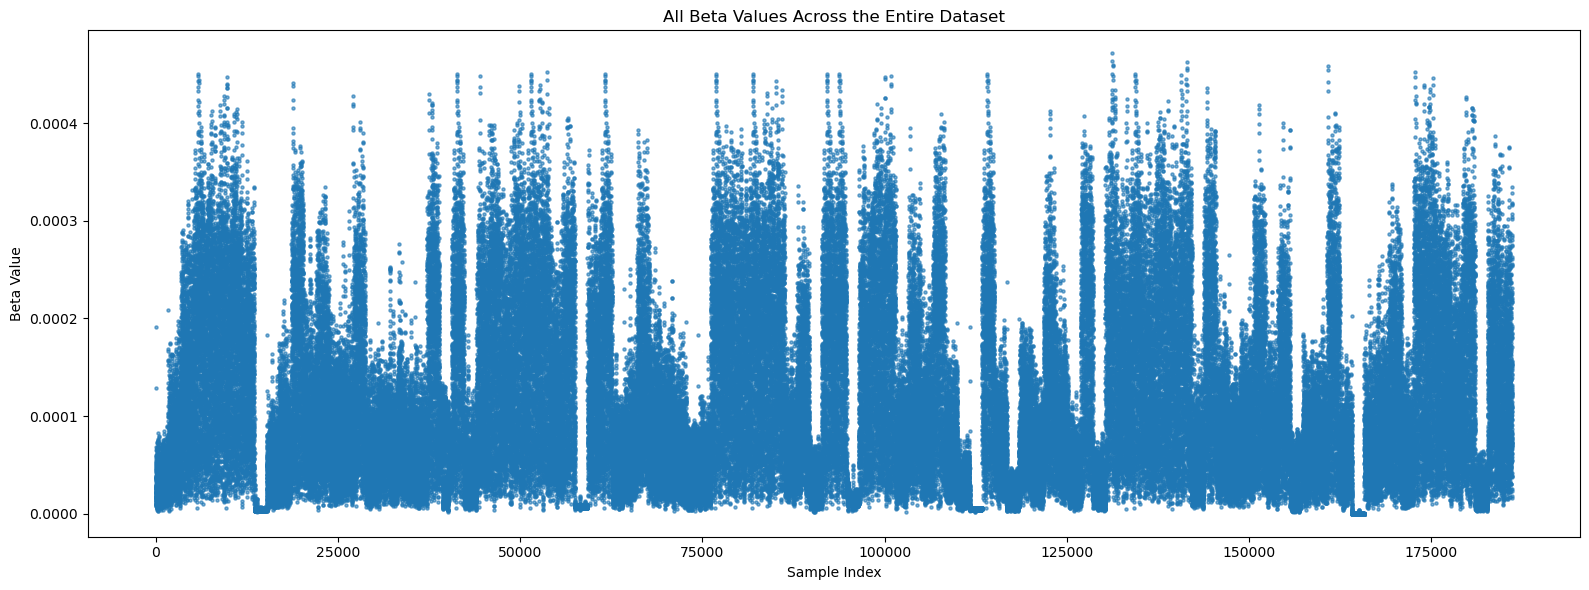

In [42]:
plt.figure(figsize=(16, 6))
plt.scatter(df.index, df['beta_value'], s=5, alpha=0.6)
plt.title('All Beta Values Across the Entire Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Beta Value')
plt.tight_layout()
plt.show()

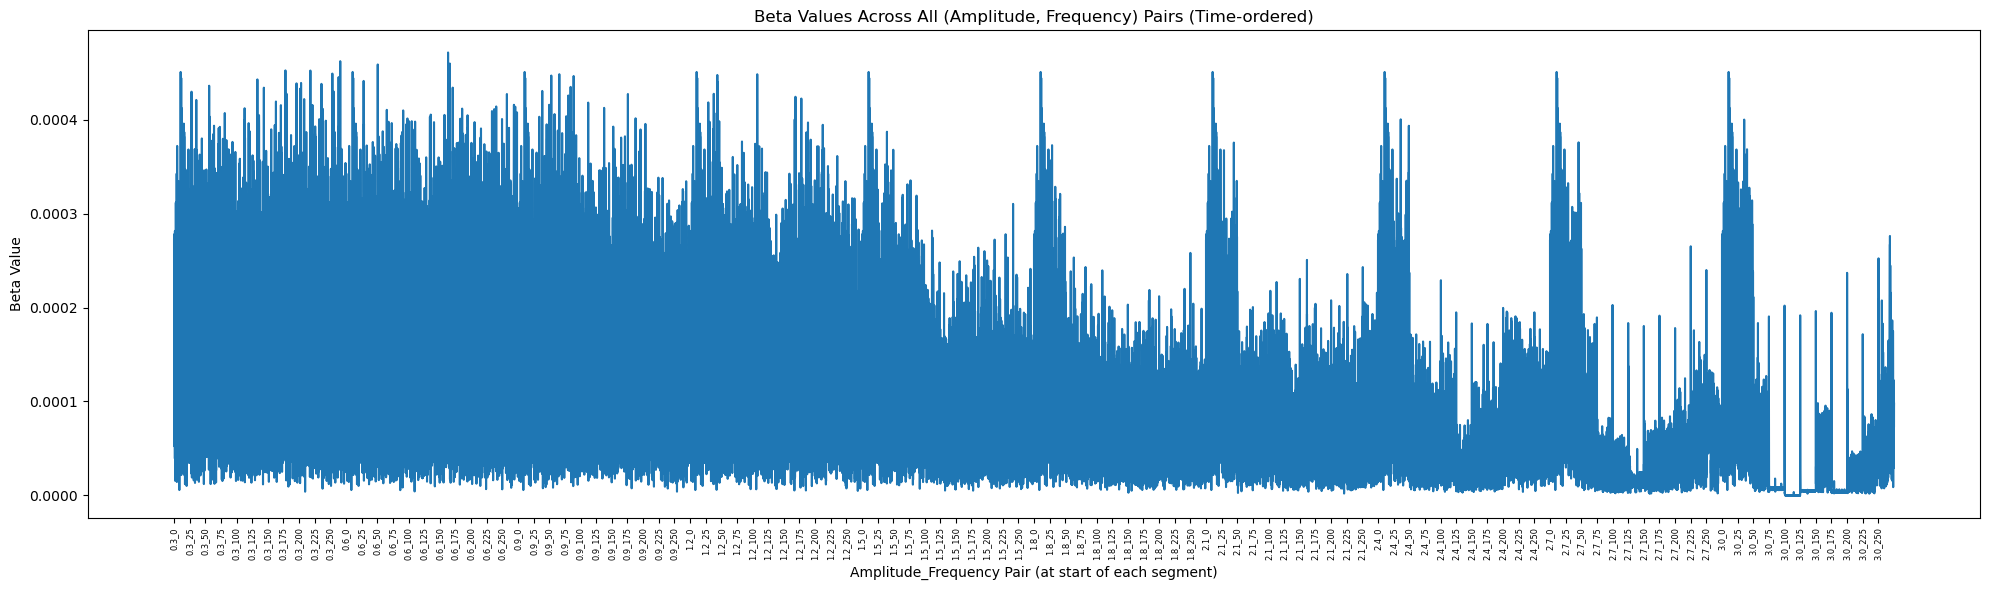

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

AMPLITUDE_START = 0.0
AMPLITUDE_END = 3.0
AMPLITUDE_STEP = 0.3

FREQUENCY_START = 0.0
FREQUENCY_END = 250.0
FREQUENCY_STEP = 25.0

# Load and sort data
df = df.sort_values(['amplitude', 'frequency', 'time']).reset_index(drop=True)

# Create a string “pair” column
df['pair'] = df['amplitude'].map(lambda x: f"{x:.1f}") + "_" + df['frequency'].astype(int).astype(str)

# Build the ordered list of pairs based on experiment loops
amps = np.arange(AMPLITUDE_START, AMPLITUDE_END + 1e-9, AMPLITUDE_STEP)
freqs = np.arange(FREQUENCY_START, FREQUENCY_END + 1e-9, FREQUENCY_STEP)
ordered_pairs = [f"{round(amp,1)}_{int(freq)}" for amp in amps for freq in freqs]

# Plot everything as one continuous line
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['beta_value'], linestyle='-')
plt.xlabel('Amplitude_Frequency Pair (at start of each segment)')
plt.ylabel('Beta Value')
plt.title('Beta Values Across All (Amplitude, Frequency) Pairs (Time-ordered)')

# Compute x-tick positions at the start index for each ordered pair
positions = []
labels = []
for pair in ordered_pairs:
    idxs = df.index[df['pair'] == pair]
    if len(idxs):
        positions.append(int(idxs[0]))
        labels.append(pair)

plt.xticks(positions, labels, rotation=90, fontsize=6)
plt.tight_layout()
plt.show()
